In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
#inputFolderName="/Users/luizaadelinaciucu/Work/ATLAS/TrackML/input/ttbar_mu200-generic"
inputFolderName="/Volumes/Luiza_SSD/ATLAS/TrackML/data/ttbar_mu200-generic"
outputFolderName="/Volumes/Luiza_SSD/ATLAS/TrackML/plots_data_exploration"
#
eventNumber="000000099"
#
inputFileName_hits_recon=inputFolderName+"/event"+eventNumber+"-hits.csv"
inputFileName_hits_truth=inputFolderName+"/event"+eventNumber+"-truth.csv"
#
list_extension=[
    "png",
    "pdf",
]
# if output folder does not exist, create it
if not os.path.exists(outputFolderName):
    os.makedirs(outputFolderName)

In [3]:
df_hits_recon=pd.read_csv(inputFileName_hits_recon)
df_hits_recon.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,0,53.6895,8.81461,-1502.5,7,2,1
1,1,70.7608,7.70057,-1502.5,7,2,1
2,2,80.2306,11.40500,-1502.5,7,2,1
3,3,63.7141,4.03639,-1502.5,7,2,1
4,4,63.8302,3.99537,-1502.5,7,2,1


In [4]:
df_hits_truth=pd.read_csv(inputFileName_hits_truth)
df_hits_truth.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz
0,0,18014467228958720,53.6668,8.82130,-1502.5,0.973584,0.159988,-28.120100
1,1,22528787094700032,70.7375,7.71636,-1502.5,0.213369,0.023315,-4.386220
2,2,63052593806442496,80.2098,11.40200,-1502.5,0.050232,0.007147,-0.985516
3,3,103588701304520704,63.7169,4.02437,-1502.5,0.196107,0.012337,-4.797500
4,4,117101080734597120,63.8096,4.00231,-1502.5,0.049758,0.003124,-1.159650


In [5]:
# combine truth and recon

df_hits=pd.concat([df_hits_recon,df_hits_truth],axis=1,sort=False)
df_hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz
0,0,53.6895,8.81461,-1502.5,7,2,1,0,18014467228958720,53.6668,8.82130,-1502.5,0.973584,0.159988,-28.120100
1,1,70.7608,7.70057,-1502.5,7,2,1,1,22528787094700032,70.7375,7.71636,-1502.5,0.213369,0.023315,-4.386220
2,2,80.2306,11.40500,-1502.5,7,2,1,2,63052593806442496,80.2098,11.40200,-1502.5,0.050232,0.007147,-0.985516
3,3,63.7141,4.03639,-1502.5,7,2,1,3,103588701304520704,63.7169,4.02437,-1502.5,0.196107,0.012337,-4.797500
4,4,63.8302,3.99537,-1502.5,7,2,1,4,117101080734597120,63.8096,4.00231,-1502.5,0.049758,0.003124,-1.159650


In [6]:
counter=0
n=df_hits["volume_id"].values
for value in n:
    if value==9:
        counter+=1
print(counter)

19483


In [7]:
counter=0
m=df_hits

Explore Data


(array([  192.,   111.,    91.,    98.,    97.,    86.,   104.,   113.,
          104.,   166.,   315.,   245.,   215.,   182.,   149.,   152.,
          159.,   356.,   390.,   303.,   291.,   268.,   320.,   294.,
          289.,   554.,   600.,   468.,   442.,   514.,   476.,   461.,
          932.,   879.,   761.,   757.,   758.,  1475.,  1215.,   969.,
          867.,  1459.,  1701.,  1764.,  3161.,  2941.,  4784.,  5840.,
        10725.,  8787.,  8680., 10688.,  5933.,  4919.,  3045.,  3167.,
         1790.,  1731.,  1427.,   914.,  1043.,  1190.,  1482.,   849.,
          750.,   759.,   858.,   905.,   462.,   578.,   456.,   470.,
          481.,   546.,   591.,   322.,   305.,   273.,   251.,   281.,
          313.,   381.,   256.,   165.,   134.,   164.,   185.,   212.,
          209.,   277.,   137.,   153.,   114.,   105.,    92.,    91.,
           73.,    82.,    84.,   140.]),
 array([-1.0245300e+03, -1.0040473e+03, -9.8356460e+02, -9.6308190e+02,
        -9.4259920e+02

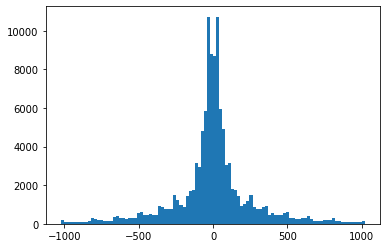

In [8]:
plt.hist(df_hits["x"],bins=100)

(array([  136.,   122.,    82.,    95.,    81.,    89.,   106.,   141.,
           96.,   184.,   288.,   236.,   206.,   203.,   136.,   142.,
          170.,   309.,   384.,   299.,   311.,   282.,   328.,   284.,
          338.,   526.,   588.,   482.,   468.,   493.,   507.,   510.,
          899.,   856.,   775.,   787.,   768.,  1494.,  1243.,   975.,
          918.,  1371.,  1742.,  1823.,  3206.,  2904.,  4872.,  5781.,
        10485.,  8634.,  8676., 10975.,  5956.,  5051.,  2938.,  3246.,
         1798.,  1734.,  1394.,   896.,   975.,  1243.,  1421.,   808.,
          710.,   743.,   893.,   897.,   484.,   478.,   466.,   473.,
          518.,   543.,   538.,   332.,   299.,   309.,   261.,   314.,
          310.,   344.,   262.,   157.,   158.,   154.,   194.,   194.,
          212.,   290.,   138.,   139.,   122.,   138.,    88.,    91.,
           93.,    69.,    88.,   128.]),
 array([-1.0253400e+03, -1.0048417e+03, -9.8434340e+02, -9.6384510e+02,
        -9.4334680e+02

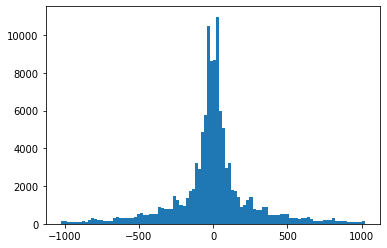

In [9]:
plt.hist(df_hits["y"],bins=100)

(array([1935.,    0.,    0.,    0.,    0.,    0., 1939.,    0.,    0.,
           0.,    0.,    0.,    0., 1982.,    0.,    0.,    0.,    0.,
           0., 1988.,    0.,    0.,    0.,    0., 4636.,    0.,    0.,
        1213., 1503., 1904.,    0., 2924.,  441., 3333.,  522.,  516.,
        3486.,  538., 3490., 3501.,  761.,  870., 1582., 1823., 1827.,
        2275., 2669., 3444., 4361., 4856., 4488., 3716., 2981., 2405.,
        2087., 1846., 1597., 1533.,  858.,  639., 3457., 3437.,  495.,
        3321.,  513.,  443., 3188.,  390., 2867.,    0., 1677., 1508.,
        1263.,    0.,    0., 4469.,    0.,    0.,    0.,    0., 1792.,
           0.,    0.,    0.,    0.,    0., 1876.,    0.,    0.,    0.,
           0.,    0.,    0., 1861.,    0.,    0.,    0.,    0.,    0.,
        1867.]),
 array([-2955.5 , -2896.39, -2837.28, -2778.17, -2719.06, -2659.95,
        -2600.84, -2541.73, -2482.62, -2423.51, -2364.4 , -2305.29,
        -2246.18, -2187.07, -2127.96, -2068.85, -2009.74, -1950.63

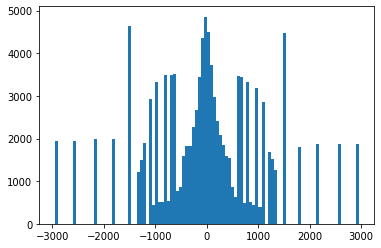

In [10]:
plt.hist(df_hits["z"],bins=100)

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0., 19705.,
        29600., 19483.,     0.,     0.,  8852., 19902.,  8318.,     0.,
         2836.,  5662.,  2535.,     0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 20 Patch objects>)

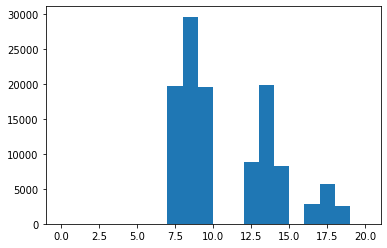

In [11]:
plt.hist(df_hits["volume_id"],bins=range(0,21,1))

0          2
1          2
2          2
3          2
4          2
          ..
116888    12
116889    12
116890    12
116891    12
116892    12
Name: layer_id, Length: 116893, dtype: int64

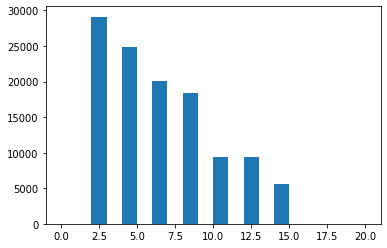

In [12]:
plt.hist(df_hits["layer_id"],bins=range(0,21,1))
df_hits["layer_id"]

0          1
1          1
2          1
3          1
4          1
          ..
116888    98
116889    98
116890    98
116891    98
116892    98
Name: module_id, Length: 116893, dtype: int64

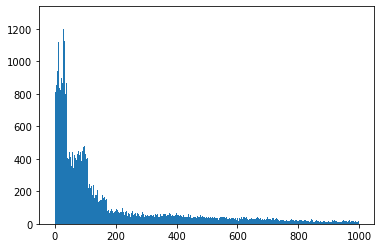

In [13]:
plt.hist(df_hits["module_id"],bins=range(0,1000,1))   #bins=100)
df_hits["module_id"]

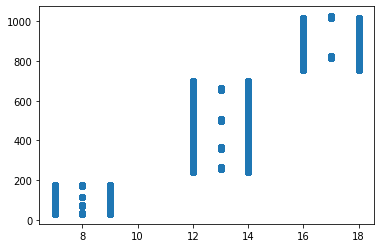

In [27]:
plt.scatter(df_hits["volume_id"],np.sqrt(df_hits["x"]**2+df_hits["y"]**2)) 

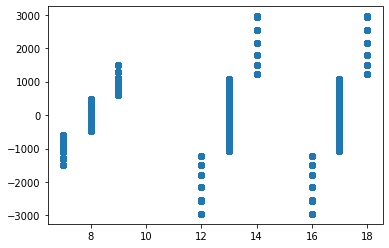

In [15]:
plt.scatter(df_hits["volume_id"],df_hits["z"]) 

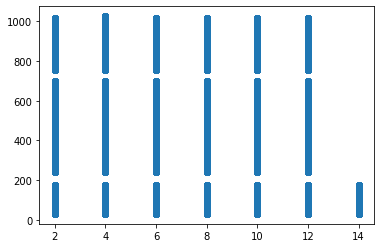

In [28]:
plt.scatter(df_hits["layer_id"],np.sqrt(df_hits["x"]**2+df_hits["y"]**2)) 

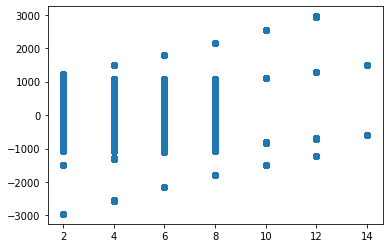

In [29]:
plt.scatter(df_hits["layer_id"],df_hits["z"])

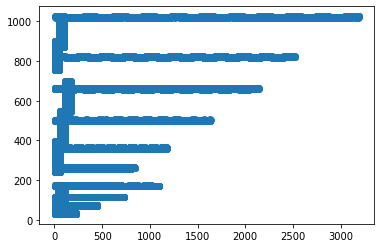

In [30]:
plt.scatter(df_hits["module_id"],np.sqrt(df_hits["x"]**2+df_hits["y"]**2)) 

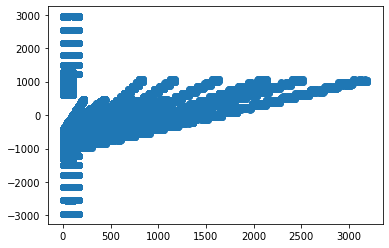

In [19]:
plt.scatter(df_hits["module_id"],df_hits["z"]) 

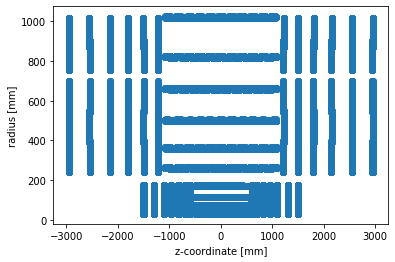

In [33]:
plt.scatter(df_hits["z"],np.sqrt(df_hits["x"]**2+df_hits["y"]**2))
plt.ylabel("radius [mm]")
plt.xlabel("z-coordinate [mm]")

for extension in list_extension:
    plt.savefig(outputFolderName+"/DataExploration_z_vs_r_scatter."+extension)

Count how many hits are in each truth particle

In [34]:
d={}
for i in df_hits["particle_id"]:
    if i not in d.keys():
        d[i]=1
    else:
        d[i]+=1
# done for loop 
for i in sorted(d.keys()):
    print("particle_id",i,"counter",d[i])

particle_id 53248 counter 10
particle_id 110592 counter 12
particle_id 68719525888 counter 6
particle_id 68719529984 counter 11
particle_id 68719587328 counter 13
particle_id 68719665152 counter 9
particle_id 137439141888 counter 12
particle_id 206158430208 counter 9
particle_id 274877906944 counter 12
particle_id 343597383680 counter 8
particle_id 412316860416 counter 16
particle_id 481036337152 counter 12
particle_id 549755813888 counter 9
particle_id 618475290624 counter 12
particle_id 687194767360 counter 12
particle_id 755914244096 counter 11
particle_id 824633720832 counter 2
particle_id 962072674304 counter 5
particle_id 1030792151040 counter 11
particle_id 1511828488192 counter 9
particle_id 1580547964928 counter 11
particle_id 1649267441664 counter 12
particle_id 1717986918400 counter 13
particle_id 1786706395136 counter 14
particle_id 1855425871872 counter 11
particle_id 1924145348608 counter 11
particle_id 1992864825344 counter 11
particle_id 2061584302080 counter 14
particl

particle_id 40532396646334464 counter 10
particle_id 40532396646371328 counter 14
particle_id 40532396646379520 counter 10
particle_id 40532396646477824 counter 11
particle_id 40532465365848064 counter 14
particle_id 40532465365856256 counter 13
particle_id 40532465365909504 counter 13
particle_id 40532465365954560 counter 10
particle_id 40532534085386240 counter 14
particle_id 40533152560578560 counter 8
particle_id 40533221280055296 counter 15
particle_id 40533289999532032 counter 11
particle_id 40533358719008768 counter 10
particle_id 40533427438485504 counter 12
particle_id 40533496157962240 counter 13
particle_id 40533564877438976 counter 12
particle_id 40533633596915712 counter 11
particle_id 40533702316392448 counter 13
particle_id 40533771035869184 counter 2
particle_id 40533839755345920 counter 5
particle_id 40533908474822656 counter 14
particle_id 40533977194299392 counter 13
particle_id 40534045913776128 counter 12
particle_id 40534114633252864 counter 12
particle_id 4053418

particle_id 54059001008095232 counter 13
particle_id 54059069727571968 counter 11
particle_id 58546863875293184 counter 10
particle_id 58546932594769920 counter 12
particle_id 58547001314246656 counter 13
particle_id 58547138753200128 counter 11
particle_id 58547688509014016 counter 2
particle_id 58547757228490752 counter 14
particle_id 58547825947967488 counter 10
particle_id 58547894667444224 counter 10
particle_id 58547963386920960 counter 9
particle_id 58548169545351168 counter 11
particle_id 58548238264827904 counter 15
particle_id 58548306984304640 counter 13
particle_id 58548375703781376 counter 10
particle_id 58548444423258112 counter 9
particle_id 58548513142734848 counter 10
particle_id 58548581862211584 counter 11
particle_id 58548650581688320 counter 11
particle_id 58548719301165056 counter 11
particle_id 58548925459595264 counter 5
particle_id 58548994179072000 counter 13
particle_id 58549062898548736 counter 8
particle_id 58549131618025472 counter 10
particle_id 585492003

particle_id 103589319779811328 counter 10
particle_id 103589594657718272 counter 12
particle_id 103589663377195008 counter 12
particle_id 103589732096671744 counter 15
particle_id 103589800816148480 counter 12
particle_id 103589938255101952 counter 12
particle_id 103590006974578688 counter 10
particle_id 103590075694055424 counter 13
particle_id 103590144413532160 counter 13
particle_id 103590213133008896 counter 4
particle_id 103590281852485632 counter 13
particle_id 103590350571962368 counter 8
particle_id 103590419291439104 counter 4
particle_id 103590488010915840 counter 7
particle_id 108086391056891904 counter 14
particle_id 108086391057022976 counter 17
particle_id 108086391057035264 counter 13
particle_id 108086391057141760 counter 11
particle_id 108086391057227776 counter 11
particle_id 108086391057235968 counter 14
particle_id 108086459776499712 counter 14
particle_id 108086459776503808 counter 11
particle_id 108086459776512000 counter 13
particle_id 108086459776589824 counter

particle_id 126100858286428160 counter 12
particle_id 126100858286485504 counter 10
particle_id 126100858286505984 counter 8
particle_id 126100858286526464 counter 10
particle_id 126100858286608384 counter 6
particle_id 126100858286616576 counter 12
particle_id 126100858286637056 counter 12
particle_id 126100927005327360 counter 11
particle_id 126100927005478912 counter 8
particle_id 126100927005560832 counter 14
particle_id 126100927005904896 counter 12
particle_id 126100927006085120 counter 8
particle_id 126100995724804096 counter 15
particle_id 126101064444280832 counter 13
particle_id 126101133163757568 counter 11
particle_id 126101201883234304 counter 13
particle_id 126101270602711040 counter 4
particle_id 126101339322187776 counter 12
particle_id 126101408041664512 counter 12
particle_id 126101476761141248 counter 16
particle_id 126101545480617984 counter 16
particle_id 126101614200094720 counter 12
particle_id 126101682919571456 counter 11
particle_id 126101751639048192 counter 

particle_id 135107988821557248 counter 8
particle_id 135107988821561344 counter 6
particle_id 135107988821598208 counter 8
particle_id 135108057540591616 counter 14
particle_id 135108057540644864 counter 12
particle_id 135108057540648960 counter 10
particle_id 135108057540784128 counter 10
particle_id 135108057540788224 counter 13
particle_id 135108057540829184 counter 12
particle_id 135108057540837376 counter 12
particle_id 135108057541021696 counter 7
particle_id 135108057541029888 counter 12
particle_id 135108057541033984 counter 8
particle_id 135108057541038080 counter 6
particle_id 135108057541074944 counter 11
particle_id 135108126260068352 counter 6
particle_id 135108126260260864 counter 13
particle_id 135108194979545088 counter 12
particle_id 135108263699021824 counter 14
particle_id 135108332418498560 counter 12
particle_id 135108401137975296 counter 8
particle_id 135108469857452032 counter 9
particle_id 135108538576928768 counter 10
particle_id 135108607296405504 counter 10
p

particle_id 166633186213060608 counter 11
particle_id 166633186213150720 counter 1
particle_id 166633186213175296 counter 11
particle_id 166633186213289984 counter 12
particle_id 166633186213335040 counter 13
particle_id 166633254932185088 counter 14
particle_id 166633254932291584 counter 8
particle_id 166633254932312064 counter 11
particle_id 166633254932340736 counter 12
particle_id 166633254932348928 counter 6
particle_id 166633254932357120 counter 11
particle_id 166633254932381696 counter 10
particle_id 166633254932480000 counter 10
particle_id 166633254932537344 counter 12
particle_id 166633254932627456 counter 1
particle_id 166633254932652032 counter 9
particle_id 166633254932766720 counter 13
particle_id 166633254932811776 counter 13
particle_id 166633323651661824 counter 9
particle_id 166633323651817472 counter 12
particle_id 166633392371138560 counter 10
particle_id 166633461090615296 counter 11
particle_id 166633529810092032 counter 12
particle_id 166633598529568768 counter 1

particle_id 175643821441286144 counter 11
particle_id 175643890160762880 counter 12
particle_id 175643958880239616 counter 11
particle_id 175644027599716352 counter 13
particle_id 175644096319193088 counter 1
particle_id 175644302477623296 counter 14
particle_id 175644371197100032 counter 11
particle_id 175644439916576768 counter 11
particle_id 175644508636053504 counter 12
particle_id 175644577355530240 counter 5
particle_id 175644714794483712 counter 6
particle_id 175644989672390656 counter 12
particle_id 175645058391867392 counter 9
particle_id 180143985094967296 counter 10
particle_id 180144053814345728 counter 14
particle_id 180144053814444032 counter 15
particle_id 180144122533773312 counter 14
particle_id 180144122533822464 counter 11
particle_id 180144191253250048 counter 12
particle_id 180144259972726784 counter 11
particle_id 180144328692203520 counter 12
particle_id 180144397411680256 counter 11
particle_id 180144466131156992 counter 12
particle_id 180144534850633728 counter

particle_id 207171973770379264 counter 11
particle_id 207172592245669888 counter 13
particle_id 207172660965146624 counter 12
particle_id 207172729684623360 counter 11
particle_id 207172798404100096 counter 4
particle_id 207172935843053568 counter 10
particle_id 207173073282007040 counter 6
particle_id 207173142001483776 counter 13
particle_id 207173210720960512 counter 10
particle_id 207173279440437248 counter 9
particle_id 207173348159913984 counter 10
particle_id 207173416879390720 counter 12
particle_id 207173485598867456 counter 7
particle_id 207173554318344192 counter 17
particle_id 207173623037820928 counter 16
particle_id 207173691757297664 counter 13
particle_id 207173760476774400 counter 14
particle_id 207173829196251136 counter 13
particle_id 207173897915727872 counter 11
particle_id 207174035354681344 counter 9
particle_id 207174104074158080 counter 9
particle_id 207174172793634816 counter 15
particle_id 207174241513111552 counter 12
particle_id 207174310232588288 counter 1

particle_id 234200580921229312 counter 11
particle_id 234200649640706048 counter 13
particle_id 234200718360182784 counter 14
particle_id 234201061957566464 counter 10
particle_id 234201130677043200 counter 1
particle_id 234201268115996672 counter 2
particle_id 234201336835473408 counter 10
particle_id 234201405554950144 counter 11
particle_id 234201474274426880 counter 11
particle_id 234201542993903616 counter 13
particle_id 234201611713380352 counter 10
particle_id 234201680432857088 counter 14
particle_id 234201749152333824 counter 13
particle_id 234201817871810560 counter 13
particle_id 234201886591287296 counter 13
particle_id 234201955310764032 counter 13
particle_id 234202024030240768 counter 15
particle_id 234202092749717504 counter 12
particle_id 234202161469194240 counter 5
particle_id 234202230188670976 counter 12
particle_id 234202298908147712 counter 11
particle_id 234202367627624448 counter 8
particle_id 234202436347101184 counter 11
particle_id 234202505066577920 counter

particle_id 265721036668928000 counter 10
particle_id 265721105388404736 counter 4
particle_id 265721311546834944 counter 13
particle_id 265721380266311680 counter 8
particle_id 265721448985788416 counter 12
particle_id 265721517705265152 counter 7
particle_id 265721586424741888 counter 4
particle_id 265721655144218624 counter 9
particle_id 265721861302648832 counter 9
particle_id 265721930022125568 counter 11
particle_id 265721998741602304 counter 13
particle_id 265722067461079040 counter 12
particle_id 265722204900032512 counter 6
particle_id 265722342338985984 counter 6
particle_id 265722411058462720 counter 1
particle_id 265722617216892928 counter 13
particle_id 265722685936369664 counter 11
particle_id 265723029533753344 counter 11
particle_id 265723098253230080 counter 15
particle_id 283726776524341248 counter 13
particle_id 283726776524443648 counter 14
particle_id 283726776524492800 counter 11
particle_id 283726776524664832 counter 10
particle_id 283726776524668928 counter 10
p

particle_id 310760262758039552 counter 14
particle_id 310760331477516288 counter 8
particle_id 310760400196993024 counter 8
particle_id 310760468916469760 counter 5
particle_id 310760537635946496 counter 3
particle_id 310760675074899968 counter 1
particle_id 310760881233330176 counter 13
particle_id 310760949952806912 counter 11
particle_id 310761018672283648 counter 14
particle_id 310761224830713856 counter 12
particle_id 310761293550190592 counter 11
particle_id 310761362269667328 counter 9
particle_id 310761430989144064 counter 10
particle_id 310761499708620800 counter 13
particle_id 310761568428097536 counter 11
particle_id 310761637147574272 counter 11
particle_id 310761705867051008 counter 11
particle_id 310761912025481216 counter 15
particle_id 310761980744957952 counter 4
particle_id 310762049464434688 counter 6
particle_id 310762118183911424 counter 10
particle_id 310762186903388160 counter 12
particle_id 310762255622864896 counter 2
particle_id 310762324342341632 counter 11
p

particle_id 342277351251378176 counter 13
particle_id 342277419970854912 counter 12
particle_id 342277488690331648 counter 11
particle_id 342277626129285120 counter 2
particle_id 342277694848761856 counter 11
particle_id 342277763568238592 counter 14
particle_id 342277832287715328 counter 11
particle_id 342277901007192064 counter 10
particle_id 342278038446145536 counter 4
particle_id 342278382043529216 counter 12
particle_id 342278450763005952 counter 12
particle_id 342278519482482688 counter 13
particle_id 342278588201959424 counter 12
particle_id 342278656921436160 counter 12
particle_id 342278725640912896 counter 14
particle_id 342278863079866368 counter 14
particle_id 342278931799343104 counter 12
particle_id 342279000518819840 counter 6
particle_id 342279275396726784 counter 11
particle_id 342279344116203520 counter 11
particle_id 342279412835680256 counter 12
particle_id 342279481555156992 counter 12
particle_id 342279550274633728 counter 7
particle_id 342279756433063936 counter

particle_id 369299086454554624 counter 15
particle_id 369299155174031360 counter 6
particle_id 369299223893508096 counter 14
particle_id 369299292612984832 counter 14
particle_id 369299361332461568 counter 13
particle_id 369299430051938304 counter 11
particle_id 369299498771415040 counter 16
particle_id 369299567490891776 counter 12
particle_id 369299636210368512 counter 14
particle_id 369299704929845248 counter 11
particle_id 369299773649321984 counter 9
particle_id 369299911088275456 counter 3
particle_id 369299979807752192 counter 10
particle_id 369300117246705664 counter 2
particle_id 369300185966182400 counter 2
particle_id 369300598283042816 counter 11
particle_id 369300667002519552 counter 8
particle_id 369301354197286912 counter 12
particle_id 369301491636240384 counter 11
particle_id 369301629075193856 counter 16
particle_id 369301835233624064 counter 5
particle_id 369301903953100800 counter 14
particle_id 369301972672577536 counter 12
particle_id 369302041392054272 counter 6


particle_id 396327556166451200 counter 3
particle_id 396327762324881408 counter 16
particle_id 396327831044358144 counter 12
particle_id 396327899763834880 counter 12
particle_id 396327968483311616 counter 11
particle_id 396328037202788352 counter 17
particle_id 396328105922265088 counter 13
particle_id 396328174641741824 counter 13
particle_id 396328243361218560 counter 11
particle_id 396328655678078976 counter 9
particle_id 396328724397555712 counter 10
particle_id 396328793117032448 counter 10
particle_id 396328861836509184 counter 14
particle_id 396328930555985920 counter 14
particle_id 396328999275462656 counter 14
particle_id 396329067994939392 counter 13
particle_id 396329136714416128 counter 16
particle_id 396329205433892864 counter 9
particle_id 396329274153369600 counter 12
particle_id 396329342872846336 counter 12
particle_id 396329411592323072 counter 13
particle_id 396329480311799808 counter 10
particle_id 396329549031276544 counter 4
particle_id 409827566090715136 counter

particle_id 432347900689776640 counter 6
particle_id 432347969409253376 counter 7
particle_id 432348038128730112 counter 13
particle_id 432348106848206848 counter 13
particle_id 432348175567683584 counter 13
particle_id 432348244287160320 counter 11
particle_id 432348313006637056 counter 11
particle_id 432348381726113792 counter 11
particle_id 432348450445590528 counter 11
particle_id 432348519165067264 counter 4
particle_id 432348587884544000 counter 11
particle_id 432348656604020736 counter 10
particle_id 436849163854974976 counter 12
particle_id 436849163854987264 counter 11
particle_id 436849163854991360 counter 11
particle_id 436849163855028224 counter 2
particle_id 436849232574451712 counter 13
particle_id 436849232574464000 counter 13
particle_id 436849232574468096 counter 11
particle_id 436849232574488576 counter 1
particle_id 436849576171798528 counter 3
particle_id 436849644891275264 counter 11
particle_id 436849713610752000 counter 10
particle_id 436849782330228736 counter 1

particle_id 477392967934410752 counter 13
particle_id 477393036653887488 counter 11
particle_id 477393105373364224 counter 10
particle_id 477393174092840960 counter 12
particle_id 477393242812317696 counter 15
particle_id 477393311531794432 counter 11
particle_id 477393380251271168 counter 11
particle_id 477393448970747904 counter 13
particle_id 477393517690224640 counter 11
particle_id 477393586409701376 counter 12
particle_id 477393655129178112 counter 14
particle_id 477393723848654848 counter 7
particle_id 477393930007085056 counter 3
particle_id 477393998726561792 counter 13
particle_id 477394342323945472 counter 12
particle_id 477394411043422208 counter 15
particle_id 477394548482375680 counter 2
particle_id 477395235677143040 counter 10
particle_id 477395304396619776 counter 14
particle_id 477395373116096512 counter 14
particle_id 477395441835573248 counter 12
particle_id 477395785432956928 counter 4
particle_id 477395854152433664 counter 14
particle_id 477395922871910400 counter

particle_id 504409343018401792 counter 11
particle_id 504409411737878528 counter 14
particle_id 504409480457355264 counter 15
particle_id 504409549176832000 counter 13
particle_id 504409617896308736 counter 12
particle_id 504409686615785472 counter 15
particle_id 504409755335262208 counter 11
particle_id 504409824054738944 counter 10
particle_id 504410305091076096 counter 10
particle_id 504410373810552832 counter 11
particle_id 504410442530029568 counter 13
particle_id 504410511249506304 counter 14
particle_id 504410579968983040 counter 12
particle_id 504410648688459776 counter 12
particle_id 504410717407936512 counter 18
particle_id 504410786127413248 counter 14
particle_id 504410854846889984 counter 10
particle_id 504410923566366720 counter 12
particle_id 504410992285843456 counter 12
particle_id 504411061005320192 counter 11
particle_id 504411129724796928 counter 16
particle_id 504411198444273664 counter 12
particle_id 522417556774998016 counter 11
particle_id 522417556775002112 cou

particle_id 535929111571333120 counter 11
particle_id 535929180290809856 counter 13
particle_id 535929249010286592 counter 9
particle_id 535929317729763328 counter 10
particle_id 535929386449240064 counter 12
particle_id 535929455168716800 counter 10
particle_id 535929523888193536 counter 12
particle_id 535929592607670272 counter 12
particle_id 535929730046623744 counter 8
particle_id 535929798766100480 counter 14
particle_id 535929867485577216 counter 14
particle_id 535929936205053952 counter 11
particle_id 535930004924530688 counter 14
particle_id 535930279802437632 counter 11
particle_id 535930348521914368 counter 10
particle_id 535930417241391104 counter 14
particle_id 535930485960867840 counter 7
particle_id 535930623399821312 counter 12
particle_id 535930692119298048 counter 10
particle_id 535930760838774784 counter 2
particle_id 535931173155635200 counter 14
particle_id 535931241875111936 counter 12
particle_id 535931310594588672 counter 13
particle_id 535931379314065408 counter

particle_id 553947014774128640 counter 13
particle_id 553947083493605376 counter 11
particle_id 553947152213082112 counter 14
particle_id 553947289652035584 counter 9
particle_id 553947358371512320 counter 15
particle_id 553947427090989056 counter 7
particle_id 553947976846802944 counter 14
particle_id 553948045566279680 counter 11
particle_id 558446422513418240 counter 12
particle_id 558447109708185600 counter 13
particle_id 558447728183476224 counter 11
particle_id 558447865622429696 counter 15
particle_id 558448071780859904 counter 12
particle_id 558448140500336640 counter 11
particle_id 558448209219813376 counter 12
particle_id 558448277939290112 counter 13
particle_id 558448346658766848 counter 14
particle_id 558448415378243584 counter 9
particle_id 562949953421312000 counter 4
particle_id 562949953421369344 counter 16
particle_id 562949953421451264 counter 15
particle_id 562949953421533184 counter 8
particle_id 562949953421561856 counter 12
particle_id 562949953421565952 counter 

particle_id 562966720973635584 counter 14
particle_id 562966789693112320 counter 10
particle_id 562966858412589056 counter 13
particle_id 562966927132065792 counter 12
particle_id 562966995851542528 counter 14
particle_id 562967064571019264 counter 11
particle_id 562967339448926208 counter 2
particle_id 562967545607356416 counter 14
particle_id 562967614326833152 counter 12
particle_id 562967683046309888 counter 11
particle_id 562967751765786624 counter 12
particle_id 562967957924216832 counter 11
particle_id 562968095363170304 counter 8
particle_id 562968164082647040 counter 11
particle_id 562968232802123776 counter 13
particle_id 562968301521600512 counter 13
particle_id 585467951558230016 counter 4
particle_id 585467951558283264 counter 13
particle_id 585467951558295552 counter 11
particle_id 585467951558320128 counter 10
particle_id 585467951558324224 counter 9
particle_id 585467951558340608 counter 6
particle_id 585467951558385664 counter 8
particle_id 585467951558389760 counter 1

particle_id 598990570190274560 counter 3
particle_id 598990638909751296 counter 12
particle_id 598990707629228032 counter 10
particle_id 598990776348704768 counter 16
particle_id 598990845068181504 counter 12
particle_id 598990913787658240 counter 9
particle_id 598991119946088448 counter 7
particle_id 598991188665565184 counter 12
particle_id 598991394823995392 counter 2
particle_id 598991463543472128 counter 7
particle_id 598991532262948864 counter 12
particle_id 598991600982425600 counter 12
particle_id 598991669701902336 counter 12
particle_id 598991738421379072 counter 11
particle_id 598991807140855808 counter 11
particle_id 598991875860332544 counter 11
particle_id 598991944579809280 counter 13
particle_id 598992013299286016 counter 8
particle_id 598992082018762752 counter 12
particle_id 598992150738239488 counter 11
particle_id 598992219457716224 counter 14
particle_id 598992288177192960 counter 12
particle_id 598992356896669696 counter 3
particle_id 598992425616146432 counter 2


particle_id 635014213248483328 counter 12
particle_id 635014281967960064 counter 12
particle_id 635014350687436800 counter 2
particle_id 635014556845867008 counter 14
particle_id 635014625565343744 counter 17
particle_id 635014694284820480 counter 14
particle_id 635014763004297216 counter 12
particle_id 635014831723773952 counter 11
particle_id 635014900443250688 counter 13
particle_id 635014969162727424 counter 11
particle_id 635015037882204160 counter 14
particle_id 635015106601680896 counter 12
particle_id 635015175321157632 counter 11
particle_id 635015244040634368 counter 11
particle_id 635015312760111104 counter 12
particle_id 635015518918541312 counter 14
particle_id 635015587638018048 counter 11
particle_id 635015656357494784 counter 10
particle_id 635015725076971520 counter 14
particle_id 635015793796448256 counter 12
particle_id 635015862515924992 counter 7
particle_id 635015931235401728 counter 16
particle_id 635015999954878464 counter 11
particle_id 635016068674355200 count

particle_id 666532813570519040 counter 6
particle_id 666532813570539520 counter 5
particle_id 666532813570584576 counter 10
particle_id 666532813570588672 counter 11
particle_id 666532882289786880 counter 15
particle_id 666532951009263616 counter 13
particle_id 666533088448217088 counter 7
particle_id 666533225887170560 counter 15
particle_id 666533294606647296 counter 14
particle_id 666533363326124032 counter 10
particle_id 666533432045600768 counter 11
particle_id 666533500765077504 counter 11
particle_id 666533638204030976 counter 2
particle_id 666533706923507712 counter 5
particle_id 666533775642984448 counter 12
particle_id 666533913081937920 counter 5
particle_id 666533981801414656 counter 11
particle_id 666534050520891392 counter 13
particle_id 666534119240368128 counter 10
particle_id 666534187959844864 counter 12
particle_id 666534256679321600 counter 11
particle_id 666534531557228544 counter 4
particle_id 666534806435135488 counter 2
particle_id 666534875154612224 counter 12


particle_id 707065141497188352 counter 12
particle_id 707065141497237504 counter 14
particle_id 707065141497241600 counter 11
particle_id 707065210216665088 counter 11
particle_id 707065210216714240 counter 14
particle_id 707065210216718336 counter 11
particle_id 707065278936121344 counter 12
particle_id 707065416375074816 counter 10
particle_id 707065485094551552 counter 13
particle_id 707065553814028288 counter 11
particle_id 707065622533505024 counter 14
particle_id 707065691252981760 counter 13
particle_id 707065759972458496 counter 8
particle_id 707065897411411968 counter 6
particle_id 707065966130888704 counter 10
particle_id 707066034850365440 counter 7
particle_id 707066103569842176 counter 8
particle_id 707066653325656064 counter 13
particle_id 707066859484086272 counter 12
particle_id 707066928203563008 counter 11
particle_id 707067271800946688 counter 14
particle_id 707067340520423424 counter 14
particle_id 716072340751953920 counter 11
particle_id 716072340751958016 counter

particle_id 756604737398349824 counter 3
particle_id 756604737398366208 counter 10
particle_id 756604806117814272 counter 9
particle_id 756604806117842944 counter 12
particle_id 756604874837196800 counter 4
particle_id 756604943556673536 counter 2
particle_id 756605012276150272 counter 4
particle_id 756605080995627008 counter 10
particle_id 756605149715103744 counter 11
particle_id 756605493312487424 counter 15
particle_id 756605562031964160 counter 13
particle_id 756605630751440896 counter 9
particle_id 756605699470917632 counter 12
particle_id 756605768190394368 counter 15
particle_id 756605836909871104 counter 6
particle_id 756605905629347840 counter 4
particle_id 756605974348824576 counter 6
particle_id 756606386665684992 counter 8
particle_id 756606592824115200 counter 11
particle_id 756606661543591936 counter 12
particle_id 756606730263068672 counter 12
particle_id 756606798982545408 counter 11
particle_id 756606867702022144 counter 9
particle_id 756607005140975616 counter 12
par

particle_id 801640733671948288 counter 13
particle_id 801640733672153088 counter 15
particle_id 801640733672157184 counter 13
particle_id 801640733672169472 counter 14
particle_id 801640733672181760 counter 11
particle_id 801640733672206336 counter 11
particle_id 801640733672288256 counter 4
particle_id 801640733672394752 counter 10
particle_id 801640733672435712 counter 15
particle_id 801640733672439808 counter 5
particle_id 801640733672443904 counter 3
particle_id 801640733672452096 counter 8
particle_id 801640733672456192 counter 12
particle_id 801640733672558592 counter 12
particle_id 801640802391425024 counter 13
particle_id 801640802391535616 counter 13
particle_id 801640802391572480 counter 8
particle_id 801640802391592960 counter 12
particle_id 801640802391617536 counter 6
particle_id 801640802391625728 counter 12
particle_id 801640802391629824 counter 10
particle_id 801640802391633920 counter 11
particle_id 801640802391646208 counter 12
particle_id 801640802391658496 counter 1

particle_id 824160930832056320 counter 8
particle_id 824160999551533056 counter 11
particle_id 824161136990486528 counter 14
particle_id 824161205709963264 counter 12
particle_id 824161274429440000 counter 14
particle_id 824161343148916736 counter 13
particle_id 824161411868393472 counter 12
particle_id 824161549307346944 counter 10
particle_id 824161618026823680 counter 8
particle_id 824161686746300416 counter 12
particle_id 824161755465777152 counter 10
particle_id 824161824185253888 counter 11
particle_id 824161892904730624 counter 12
particle_id 824161961624207360 counter 13
particle_id 824162167782637568 counter 12
particle_id 824162236502114304 counter 11
particle_id 824162305221591040 counter 13
particle_id 824162442660544512 counter 10
particle_id 824162511380021248 counter 6
particle_id 824162648818974720 counter 11
particle_id 824162717538451456 counter 15
particle_id 842173130318295040 counter 9
particle_id 842173130318307328 counter 14
particle_id 842173130318393344 counter

particle_id 896216806883065856 counter 15
particle_id 896216875602542592 counter 9
particle_id 896217219199926272 counter 6
particle_id 896217356638879744 counter 7
particle_id 896217494077833216 counter 9
particle_id 896217562797309952 counter 6
particle_id 896217906394693632 counter 15
particle_id 896217975114170368 counter 1
particle_id 896218043833647104 counter 15
particle_id 896218112553123840 counter 11
particle_id 896218181272600576 counter 9
particle_id 896218318711554048 counter 2
particle_id 900719925474099200 counter 2
particle_id 900719925474119680 counter 10
particle_id 900719925474123776 counter 12
particle_id 900719925474127872 counter 1
particle_id 900719925474197504 counter 12
particle_id 900719925474205696 counter 10
particle_id 900719994193575936 counter 8
particle_id 900719994193596416 counter 11
particle_id 900719994193604608 counter 13
particle_id 900719994193674240 counter 12
particle_id 900719994193682432 counter 9
particle_id 900719994193694720 counter 10
part

particle_id 914233404415803392 counter 13
particle_id 914233473135280128 counter 10
particle_id 914233541854756864 counter 12
particle_id 914233679293710336 counter 10
particle_id 914233748013187072 counter 14
particle_id 914233816732663808 counter 12
particle_id 914233885452140544 counter 14
particle_id 914234022891094016 counter 11
particle_id 914234091610570752 counter 14
particle_id 914234160330047488 counter 13
particle_id 914234229049524224 counter 9
particle_id 914234297769000960 counter 9
particle_id 914234778805338112 counter 12
particle_id 914234847524814848 counter 12
particle_id 914234916244291584 counter 12
particle_id 914234984963768320 counter 10
particle_id 914235053683245056 counter 5
particle_id 914235122402721792 counter 14
particle_id 914235397280628736 counter 11
particle_id 914235466000105472 counter 12
particle_id 914235534719582208 counter 12
particle_id 914235603439058944 counter 13
particle_id 914235672158535680 counter 11
particle_id 914235740878012416 counte

particle_id 923238748244672512 counter 15
particle_id 923238816964149248 counter 11
particle_id 923238885683625984 counter 10
particle_id 923238954403102720 counter 9
particle_id 923239023122579456 counter 14
particle_id 923239091842056192 counter 11
particle_id 923239160561532928 counter 13
particle_id 923239229281009664 counter 13
particle_id 923239298000486400 counter 12
particle_id 923239366719963136 counter 13
particle_id 923239435439439872 counter 11
particle_id 923239641597870080 counter 6
particle_id 923240122634207232 counter 10
particle_id 923240191353683968 counter 11
particle_id 923240260073160704 counter 18
particle_id 923240328792637440 counter 7
particle_id 923240397512114176 counter 10
particle_id 923240466231590912 counter 10
particle_id 923240534951067648 counter 11
particle_id 923240603670544384 counter 11
particle_id 923240672390021120 counter 11
particle_id 923240741109497856 counter 12
particle_id 923240809828974592 counter 11
particle_id 923240878548451328 counte

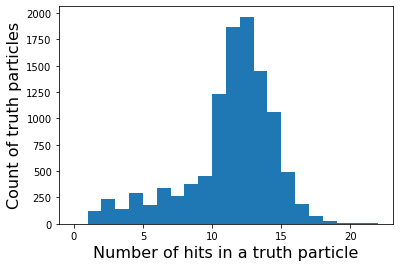

In [36]:
# plot the counter of hits for each particle in a histogram
plt.hist(d.values(),bins=range(0,23,1))
plt.xlabel("Number of hits in a truth particle", fontsize=16)
plt.ylabel("Count of truth particles",fontsize=16)
for extension in list_extension:
    plt.savefig(outputFolderName+"/DataExploration_histo_counterTruthParticles_vs_nbHitsInTruthParticle."+extension)

(array([[ 343.],
        [5218.],
        [4088.],
        [2169.],
        [ 718.],
        [ 360.],
        [ 374.],
        [ 344.],
        [ 306.],
        [ 279.],
        [ 346.],
        [ 310.],
        [ 316.],
        [ 275.],
        [ 240.],
        [ 237.],
        [ 242.],
        [ 245.],
        [ 263.]]),
 array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
        47, 48, 49]),
 array([8, 9]),
 <matplotlib.collections.QuadMesh at 0x117d368d0>)

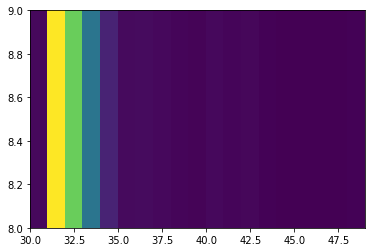

In [37]:
plt.hist2d(np.sqrt(df_hits["x"]**2+df_hits["y"]**2),df_hits["volume_id"],
           bins=[range(30,50,1),range(8,10,1)],
           cmin=10)

(array([[ 343.],
        [5218.],
        [4088.],
        [2169.],
        [ 718.],
        [ 360.],
        [ 374.],
        [ 344.],
        [ 306.],
        [ 279.],
        [ 346.],
        [ 310.],
        [ 316.],
        [ 275.],
        [ 240.],
        [ 237.],
        [ 242.],
        [ 245.],
        [ 263.]]),
 array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
        47, 48, 49]),
 array([8, 9]),
 <matplotlib.collections.QuadMesh at 0x11761a750>)

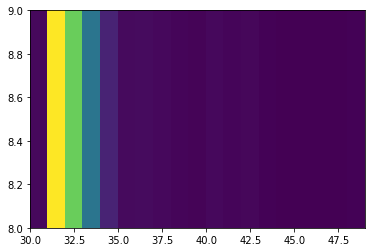

In [38]:
plt.hist2d(np.sqrt(df_hits["x"]**2+df_hits["y"]**2),df_hits["volume_id"],
           bins=[range(30,50,1),range(8,10,1)],
           cmin=10)

Study the x, y, z interval for each `volume_id`. 

In [41]:
debug=False
list_index=[]
nparray_layer_id=df_hits["layer_id"].values
nparray_z=df_hits["z"].values
nparray_r=np.sqrt(df_hits["x"]**2+df_hits["y"]**2)
for i,val in enumerate(df_hits["volume_id"].values):
    if (True)==False:
        continue
    if (True)==False:
        continue
    #if (val==8)==False:
    #    continue
    #if (nparray_layer_id[i]==2)==False:
    #    continue
    r=nparray_r[i]
    z=nparray_z[i]
    if debug:
        print("i",i,"val",val,"z",z)
    list_index.append(i)
print("len",len(list_index))


len 116893


In [42]:
df_reduced=df_hits.iloc[list_index]
df_reduced

,hit_id,x,y,z,volume_id,layer_id,module_id,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz
0,0,53.6895,8.81461,-1502.5,7,2,1,0,18014467228958720,53.6668,8.82130,-1502.5,0.973584,0.159988,-28.120100
1,1,70.7608,7.70057,-1502.5,7,2,1,1,22528787094700032,70.7375,7.71636,-1502.5,0.213369,0.023315,-4.386220
2,2,80.2306,11.40500,-1502.5,7,2,1,2,63052593806442496,80.2098,11.40200,-1502.5,0.050232,0.007147,-0.985516
3,3,63.7141,4.03639,-1502.5,7,2,1,3,103588701304520704,63.7169,4.02437,-1502.5,0.196107,0.012337,-4.797500
4,4,63.8302,3.99537,-1502.5,7,2,1,4,117101080734597120,63.8096,4.00231,-1502.5,0.049758,0.003124,-1.159650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116888,116888,-961.3640,53.08930,2952.5,18,12,98,116888,585472418324152320,-956.7110,52.81380,2952.5,-1.442520,0.079645,4.686170
116889,116889,-972.9560,34.46040,2952.5,18,12,98,116889,671040467646808064,-973.8240,34.57300,2952.5,-0.447856,0.015907,1.394060
116890,116890,-937.8320,95.85610,2952.5,18,12,98,116890,765613654639902720,-937.8470,95.88900,2952.5,-0.404170,0.041329,1.265240
116891,116891,-901.0230,18.39200,2952.5,18,12,98,116891,765620801465483264,-896.3470,18.07520,2952.5,-0.147255,0.002971,0.482319


(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([-3000, -2990, -2980, -2970, -2960, -2950, -2940, -2930, -2920,
        -2910, -2900, -2890, -2880, -2870, -2860, -2850, -2840, -2830,
        -2820, -2810, -2800, -2790, -2780, -2770, -2760, -2750, -2740,
        -2730, -2720, -2710, -2700, -2690, -2680, -2670, -2660, -2650,
        -2640, -2630, -2620, -2610, -2600, -2590, -2580, -2570, -2560,
        -2550, -2540, -2530, -2520, -2510, -2500, -2490, -2480, -2470,
        -2460, -2450, -2440, -2430, -2420, -2410, -2400, -2390, -2380,
        -2370, -2360, -2350, -2340, -2330, -2320, -2310, -2300, -2290,
        -2280, -2270, -2260, -2250, -2240, -2230, -2220, -2210, -2200,
        -2190, -2180, -2170, -2160, -2150, -2140, -2130, -2120, -2110,
     

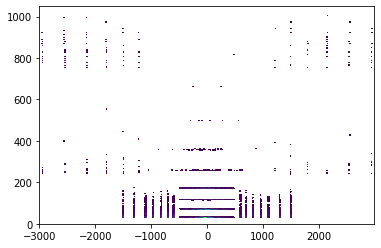

In [43]:
plt.hist2d(
        df_reduced["z"],np.sqrt(df_reduced["x"]**2+df_reduced["y"]**2),
        bins=[range(-3000,3000,10),range(0,1050,1)],
        cmin=10,
        )

(array([    0.,     0., 29124.,     0., 24923.,     0., 20030.,     0.,
        18354.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

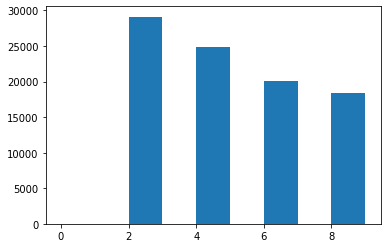

In [44]:
plt.hist(df_reduced["layer_id"],bins=range(0,10,1))

In [ ]:
# let's find the min and max of x, y, z of hits
# in each pair of volume_id and layer_id

In [45]:
def get_eventNumber_from_fileName(fileName):
    eventNumber=fileName.replace("event","").replace("-hits.csv","")
    return eventNumber

In [46]:
# calculate event numbers from my folder
# lista goala in care sa pun numerele evenimentelor
list_eventNumber=[]
# The sorted() function returns a sorted list of the specified iterable object 
# Strings are sorted alphabetically, and numbers are sorted numerically
# os operating system 
# hits ca sa nu am de doura ori evenimentul in lista
for fileName in sorted(os.listdir(inputFolderName)):
    if fileName.endswith("-hits.csv"):
        #print(fileName)
        eventNumber=get_eventNumber_from_fileName(fileName)
        #print(eventNumber)
        list_eventNumber.append(eventNumber)
# done for loop
#list_eventNumber=["000000007"]
print("All events available in my folder. list_eventNumber", list_eventNumber)

All events available in my folder. list_eventNumber ['000000000', '000000001', '000000002', '000000003', '000000004', '000000005', '000000006', '000000007', '000000008', '000000009', '000000010', '000000011', '000000012', '000000013', '000000014', '000000015', '000000016', '000000017', '000000018', '000000019', '000000020', '000000021', '000000022', '000000023', '000000024', '000000025', '000000026', '000000027', '000000028', '000000029', '000000030', '000000031', '000000032', '000000033', '000000034', '000000035', '000000036', '000000037', '000000038', '000000039', '000000040', '000000041', '000000042', '000000043', '000000044', '000000045', '000000046', '000000047', '000000048', '000000049', '000000050', '000000051', '000000052', '000000053', '000000054', '000000055', '000000056', '000000057', '000000058', '000000059', '000000060', '000000061', '000000062', '000000063', '000000064', '000000065', '000000066', '000000067', '000000068', '000000069', '000000070', '000000071', '000000072'

In [47]:
debug=False
verbose=False

In [48]:
dict_name_list_list_zrMinMax={}

for i,eventNumber in enumerate(list_eventNumber):

    print("i",i,"eventNumber",eventNumber)
    
    inputFileName_hits_recon=inputFolderName+"/event"+eventNumber+"-hits.csv"
    inputFileName_hits_truth=inputFolderName+"/event"+eventNumber+"-truth.csv"
    
    if debug or verbose:
        print("Read csv files ad df and merge them")
    df_hits_recon=pd.read_csv(inputFileName_hits_recon)
    df_hits_truth=pd.read_csv(inputFileName_hits_truth)
    df_hits=pd.concat([df_hits_recon,df_hits_truth],axis=1,sort=False)
    
    # to free RAM memory, let's delete the data frames of recon and truth from memory
    del df_hits_recon
    del df_hits_truth

    # 
    nparray_hit_id=df_hits["hit_id"].values
    nparray_volume_id=df_hits["volume_id"].values
    nparray_layer_id=df_hits["layer_id"].values
    nparray_x=df_hits["x"].values
    nparray_y=df_hits["y"].values
    nparray_z=df_hits["z"].values
    nparray_r=np.sqrt(nparray_x**2+nparray_y**2)

    # if for each event keep only a few hits
    max_hit_id=-1
    for hit_id,hit_id2 in nparray_hit_id:
        if max_hit_id>=0:
            if hit_id > max_hit_id:
                continue
        if debug or hit_id%50000==0:
            print("hit_id",hit_id)
        volume_id=nparray_volume_id[hit_id]
        layer_id=nparray_layer_id[hit_id]
        name=str(volume_id)+"_"+str(layer_id)
        x=nparray_x[hit_id]
        y=nparray_y[hit_id]
        z=nparray_z[hit_id]
        r=nparray_r[hit_id]
        if debug:
            print("volume_id",volume_id,"layer_id",layer_id,"name",name,"x",x,"y",y,"z",z)
        #
        # calculate min and max value of z and r for each volume_id and layer_id
        if name not in dict_name_list_list_zrMinMax.keys():
            # name is not yet in dictionary
            # add in dictionary with a value of a list of list
            # z
            # we know z varies between [-3000, 3000]
            # first element is the starting position for min, so a large value of z, so 10000
            # second element is the starting position for the max, so a small value of z, so -10000
            # so to be safe we choose [-10000.0,10000.0]
            # r
            # we know r varies between [0, 1050]
            # first element is the starting position for min, so a large value of z, so 2000
            # second element is the starting position for the max, so a small value of z, so 0
            # so to be safe we choose [2000.0,0.0]
            dict_name_list_list_zrMinMax[name]=[[10000.0,-10000.0],[2000.0,0.0]]
        # done if
        # z
        # now compare current z value with the min
        if z<dict_name_list_list_zrMinMax[name][0][0]:
            dict_name_list_list_zrMinMax[name][0][0]=z
        # done if
        # now compare current z value with the max
        if z>dict_name_list_list_zrMinMax[name][0][1]:
            dict_name_list_list_zrMinMax[name][0][1]=z
        # done if
        # r
        # now compare current r value with the min
        if r<dict_name_list_list_zrMinMax[name][1][0]:
            dict_name_list_list_zrMinMax[name][1][0]=r
        # done if
        # now compare current r value with the max
        if r>dict_name_list_list_zrMinMax[name][1][1]:
            dict_name_list_list_zrMinMax[name][1][1]=r
        # done if
    # done for loop over hits
# done for loop over events

i 0 eventNumber 000000000
hit_id 0
hit_id 50000
hit_id 100000
i 1 eventNumber 000000001
hit_id 0
hit_id 50000
hit_id 100000
i 2 eventNumber 000000002
hit_id 0
hit_id 50000
hit_id 100000
i 3 eventNumber 000000003
hit_id 0
hit_id 50000
hit_id 100000
i 4 eventNumber 000000004
hit_id 0
hit_id 50000
hit_id 100000
i 5 eventNumber 000000005
hit_id 0
hit_id 50000
hit_id 100000
i 6 eventNumber 000000006
hit_id 0
hit_id 50000
hit_id 100000
i 7 eventNumber 000000007
hit_id 0
hit_id 50000
hit_id 100000
i 8 eventNumber 000000008
hit_id 0
hit_id 50000
hit_id 100000
i 9 eventNumber 000000009
hit_id 0
hit_id 50000
hit_id 100000
i 10 eventNumber 000000010
hit_id 0
hit_id 50000
hit_id 100000
i 11 eventNumber 000000011
hit_id 0
hit_id 50000
hit_id 100000
i 12 eventNumber 000000012
hit_id 0
hit_id 50000
i 13 eventNumber 000000013
hit_id 0
hit_id 50000
hit_id 100000
i 14 eventNumber 000000014
hit_id 0
hit_id 50000
i 15 eventNumber 000000015
hit_id 0
hit_id 50000
i 16 eventNumber 000000016
hit_id 0
hit_id 5

In [49]:
if True:
    for name in dict_name_list_list_zrMinMax:
        val=dict_name_list_list_zrMinMax[name]
        print("name",name,"val",val)

name 7_2 val [[-1502.5, -1497.5], [30.028138366705317, 176.15921306011788]]
name 7_4 val [[-1302.5, -1297.5], [30.028075651463247, 176.1685856246794]]
name 7_6 val [[-1102.5, -1097.5], [30.028101967656898, 176.1527610683409]]
name 7_8 val [[-962.5, -957.5], [30.028101967656898, 176.15966157508933]]
name 7_10 val [[-822.5, -817.5], [30.028075651463247, 176.16421185076155]]
name 7_12 val [[-702.5, -697.5], [30.028115941124245, 176.15057437839934]]
name 7_14 val [[-602.5, -597.5], [30.028075651463247, 176.15418973444827]]
name 8_2 val [[-490.666, 490.52], [31.43929651010022, 34.425574298332336]]
name 8_4 val [[-490.776, 490.836], [71.06638794732712, 73.88108834803397]]
name 8_6 val [[-490.945, 490.897], [114.87942644599163, 117.70784858045789]]
name 8_8 val [[-490.903, 490.892], [170.78072369297686, 173.61412340302275]]
name 9_2 val [[597.5, 602.5], [30.028075651463247, 176.13489046116143]]
name 9_4 val [[697.5, 702.5], [30.028153877226618, 176.13526200852002]]
name 9_6 val [[817.5, 822.5